Is it OK to initialize all the weights to the same value as long as that value is selected
randomly using He initialization?

In [ ]:
"""
I don't things that would be a great idea as even if we have a different initialization methods but if the weights are same then there is not difference of all the layers and 
neurons they can just be contracted to 1 neuron per layer or even 1 neuron only as the different layers won't also make any sense. The things about He initialization is that 
all the weights are from same distribution(not same) and are assumed to be indepedent of each other.
"""

Is it OK to initialize bias to 0?

In [ ]:
"""
The bias term is there to prevent the network to face the vanishing gradient problems incase we have some solution employed in order to deal with it that we can set bias 
to 0.
"""

Name three advantages of the SELU activation function over ReLU.

In [ ]:
"""
1. Vanishing gradient problem is not seen in SELU.
2. SELU learns faster and better than other algorithms without needing further precession.
3. have self normalization mechanism meaning values already have unit variance and 0 mean.
"""

In which cases would you want to use each of the following activation functions: SELU, leaky
ReLU (and its variants), ReLU, tanh, logistic, and softmax?

In [ ]:
"""
Softmax is used when we have multi-class classification
In the hidden layers we can use the ReLU family (SELU, ReLU, Leaky ReLU) specially when the vanishing gradient might occur.
tanh is used for situation where vanishing gradient is quite less probable to occur.
logistic function is good for binary output but again suffers from vanishing gradient problem
"""

What may happen if you set the momentum hyperparameter too close to 1 (e.g., 0.99999)
when using an SGD optimizer?

In [ ]:
"""
A higher value of momentum will cause algorithm to go into wrong direction or oscillate around the global minimum rather than converging to it.
"""

Name three ways you can produce a sparse model.

In [ ]:
"""
1. We can give make the weights sparse
2. we can make some inputs sparse
3. we can set the regularization term to a adequate value in order to evaluate the spareness of coeffient.
"""

Does dropout slow down training? Does it slow down inference (i.e., making predictions on
new instances)? What about MC Dropout?

In [ ]:
"""
Well it does slow down the training process but give a increases the chances of getting a more accurate and generaized model. But it does not affect the inference time 
as dropout is only involved in the training process and helps reduce the chances of overfitting. Same is for the Monte carlo dropout to the difference is that we can 
involve the dropout in the prediction process to produce different kinds of output.
"""

Practice training a deep neural network on the CIFAR10 image dataset:

In [38]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import os
from tensorflow import keras
from keras.datasets import cifar10
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

In [62]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [54]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(np.unique(y_train))

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[0 1 2 3 4 5 6 7 8 9]


[29, 4, 6, 9, 3, 27, 0, 7, 8, 1]


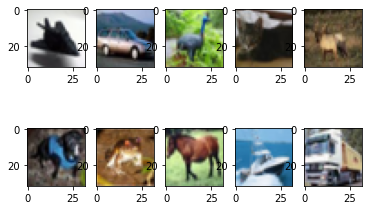

In [42]:
import matplotlib.pyplot as plt

index_list_classes = []
for i in np.unique(y_train):
  index_list_classes.append(np.where(y_train==i)[0][0])
print(index_list_classes)

fig, axarr = plt.subplots(2, 5)
j, k = 0, 0
for i in index_list_classes:
  image = X_train[i]
  axarr[j][k].imshow(image)
  k+=1
  if k == 5:
    j=1
    k=0
plt.show()

classes_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [63]:
def preprocessing(X_train, X_test, y_train, y_test):
  X_train, X_test = X_train / 255.0, X_test / 255.0
  # X_train, X_test = X_train / 255.0, X_test / 255.0
  y_train, y_test = to_categorical(y_train, num_classes = len(classes_names)), to_categorical(y_test, num_classes = len(classes_names))
  return X_train, X_test, y_train, y_test

In [64]:
X_train, X_test, y_train, y_test = preprocessing(X_train, X_test, y_train, y_test)

In [69]:
INPUT_SHAPE = (32, 32, 3)
OUPUT_SHAPE = 10
BATCH_SIZE = 100
EPOCHS = 10
VERBOSE = 2

In [70]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

In [71]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [73]:
history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
350/350 - 50s - loss: 1.6313 - accuracy: 0.4085 - val_loss: 1.3535 - val_accuracy: 0.5151 - 50s/epoch - 143ms/step
Epoch 2/10
350/350 - 55s - loss: 1.2601 - accuracy: 0.5508 - val_loss: 1.2207 - val_accuracy: 0.5727 - 55s/epoch - 158ms/step
Epoch 3/10
350/350 - 47s - loss: 1.1032 - accuracy: 0.6096 - val_loss: 1.1285 - val_accuracy: 0.6078 - 47s/epoch - 135ms/step
Epoch 4/10
350/350 - 47s - loss: 0.9997 - accuracy: 0.6475 - val_loss: 1.0306 - val_accuracy: 0.6460 - 47s/epoch - 133ms/step
Epoch 5/10
350/350 - 47s - loss: 0.9254 - accuracy: 0.6763 - val_loss: 0.9993 - val_accuracy: 0.6549 - 47s/epoch - 135ms/step
Epoch 6/10
350/350 - 47s - loss: 0.8563 - accuracy: 0.7011 - val_loss: 0.9890 - val_accuracy: 0.6579 - 47s/epoch - 133ms/step
Epoch 7/10
350/350 - 47s - loss: 0.7889 - accuracy: 0.7249 - val_loss: 0.9713 - val_accuracy: 0.6696 - 47s/epoch - 133ms/step
Epoch 8/10
350/350 - 46s - loss: 0.7241 - accuracy: 0.7493 - val_loss: 0.9717 - val_accuracy: 0.6711 - 46s/epoch - 132

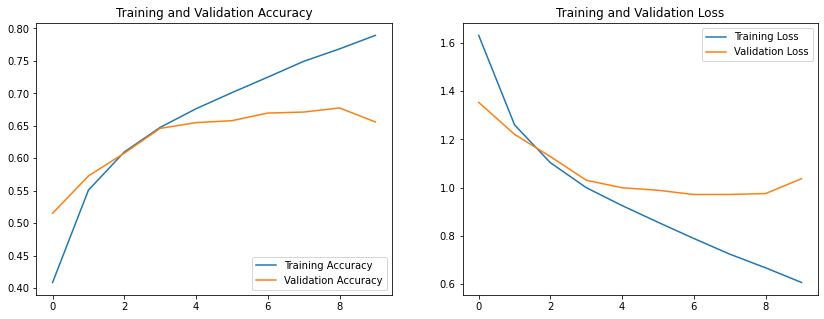

In [74]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

In [75]:
model.evaluate(X_test, y_test, verbose=False)

[1.032157301902771, 0.6563000082969666]